In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
x = pd.read_csv('framingham.csv')
df = pd.DataFrame(x)
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns[df.isnull().any()]

Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.columns[df.isnull().any()]

Index([], dtype='object')

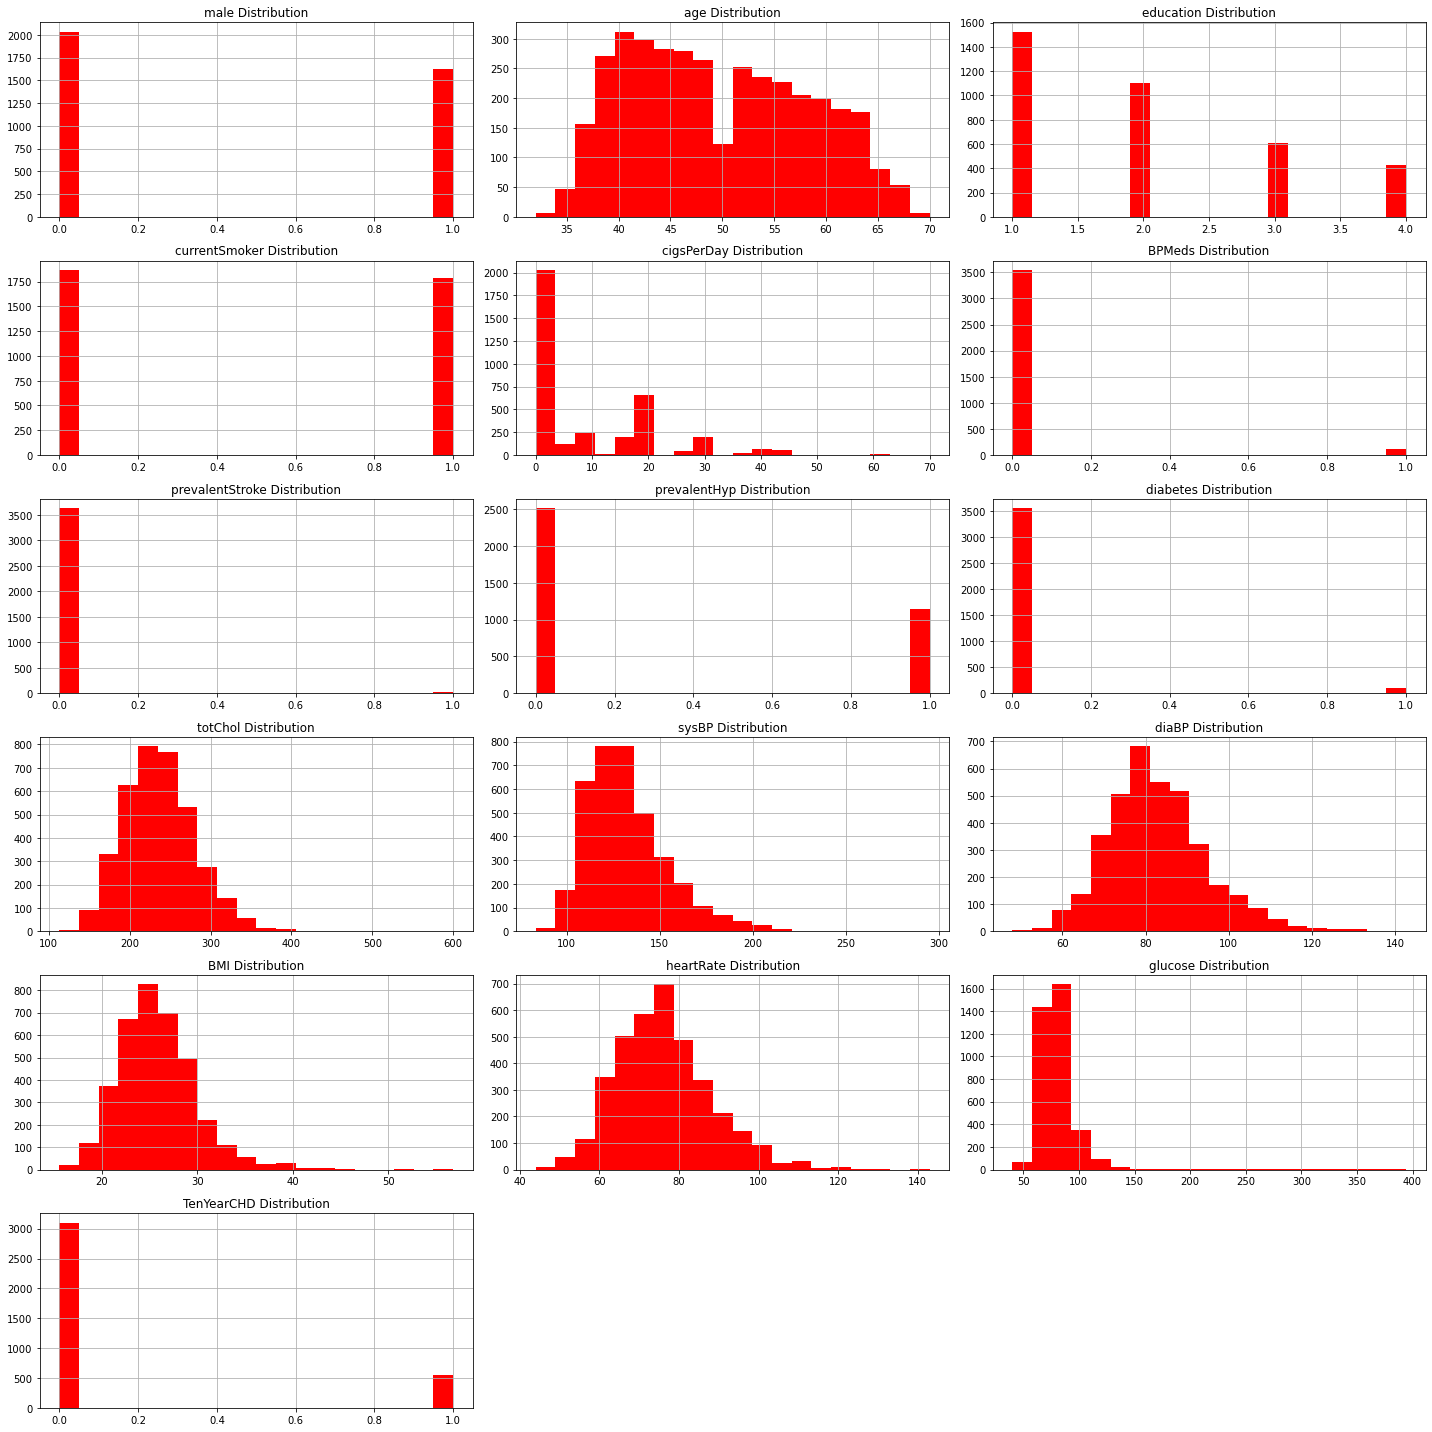

In [9]:
# Exploratory Analysis
def EA(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+" Distribution",color='black')
    fig.tight_layout()  
    plt.show()
EA(df,df.columns,6,3)

In [10]:
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

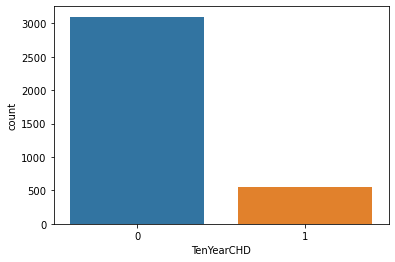

In [11]:
sns.countplot(x='TenYearCHD',data=df)
# There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

In [12]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


In [14]:
X = df[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

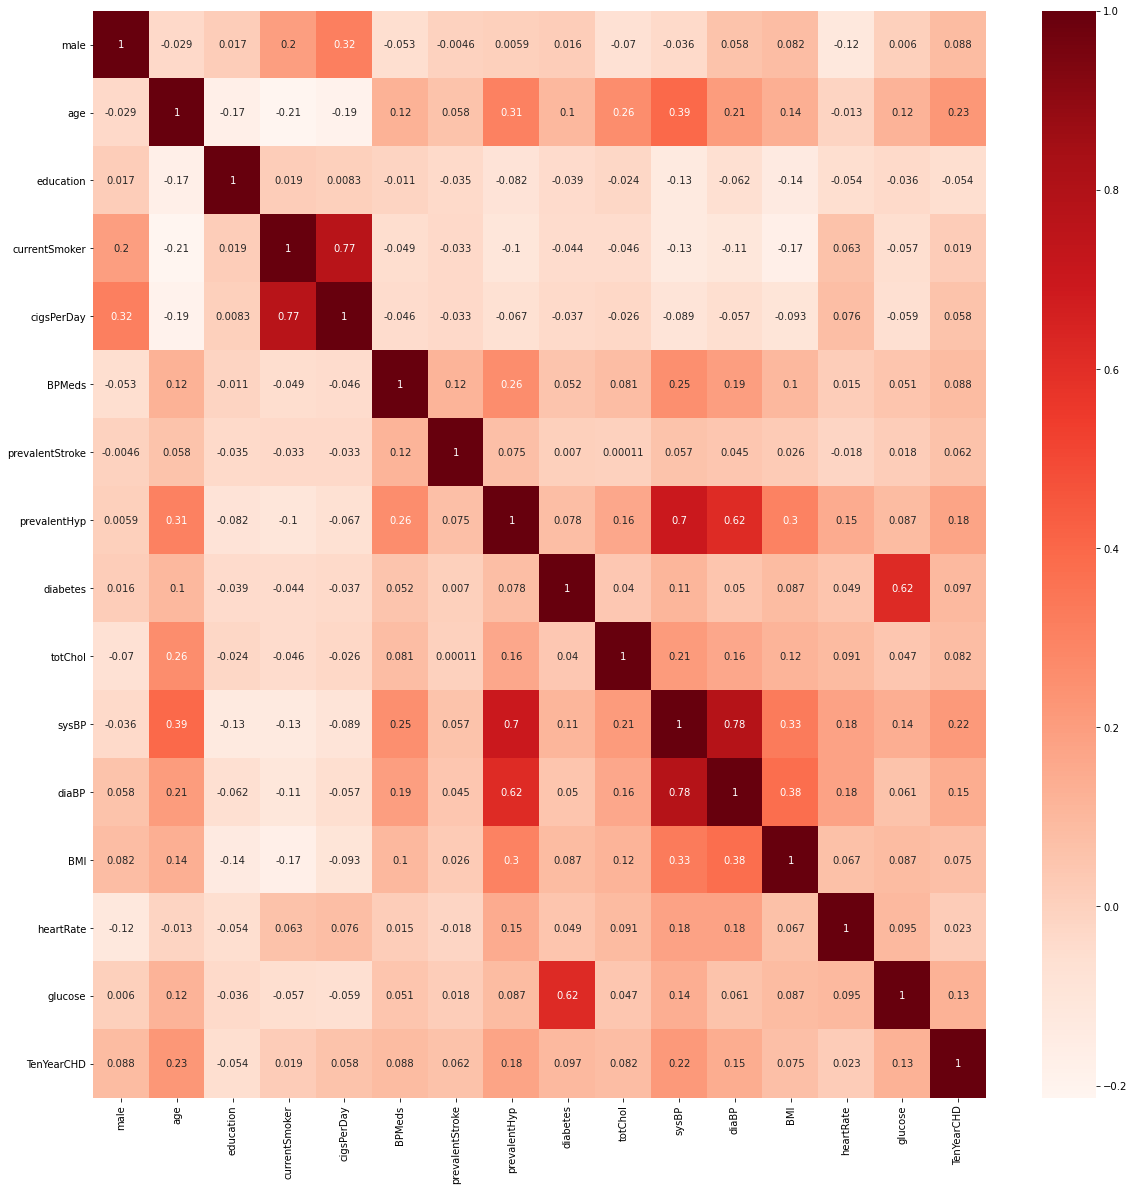

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
breast_cancer_corr = x.corr()
sns.heatmap(breast_cancer_corr, annot=True, cmap=plt.cm.Reds)
# plt.savefig('E:\Heatmap.png', dpi=1000)
plt.show()

In [16]:
high_correlation = breast_cancer_corr.abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
print(high_correlation_sort)
print("=============================================================================")
for i in range(len(high_correlation_sort)):
    if high_correlation_sort[i]==0.60 and high_correlation_sort[i]<1:
        print(i)
print("=============================================================================")


TenYearCHD       TenYearCHD         1.000000
glucose          glucose            1.000000
age              age                1.000000
education        education          1.000000
currentSmoker    currentSmoker      1.000000
                                      ...   
male             prevalentHyp       0.005853
                 prevalentStroke    0.004550
prevalentStroke  male               0.004550
                 totChol            0.000105
totChol          prevalentStroke    0.000105
Length: 256, dtype: float64


In [17]:
print(high_correlation_sort[15:25])
print("=============================================================================")

male           male             1.000000
sysBP          diaBP            0.783952
diaBP          sysBP            0.783952
cigsPerDay     currentSmoker    0.769774
currentSmoker  cigsPerDay       0.769774
sysBP          prevalentHyp     0.696656
prevalentHyp   sysBP            0.696656
diabetes       glucose          0.617630
glucose        diabetes         0.617630
prevalentHyp   diaBP            0.615840
dtype: float64


In [18]:
final_features = df[['male','sysBP','diaBP','cigsPerDay','currentSmoker','prevalentHyp','diabetes','glucose','TenYearCHD']]

In [19]:
a = list(final_features.columns)

In [20]:
a

['male',
 'sysBP',
 'diaBP',
 'cigsPerDay',
 'currentSmoker',
 'prevalentHyp',
 'diabetes',
 'glucose',
 'TenYearCHD']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(final_features.drop('TenYearCHD', axis=1), final_features['TenYearCHD'], test_size = 0.30, random_state=5)

In [22]:
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape) 

Train set: (2560, 8) (2560,)
Test set: (1098, 8) (1098,)


In [23]:
type(X_train)

pandas.core.frame.DataFrame

In [24]:
type(y_train)

pandas.core.series.Series

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
logmodel = LogisticRegression(max_iter=200)

In [27]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [28]:
prediction = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

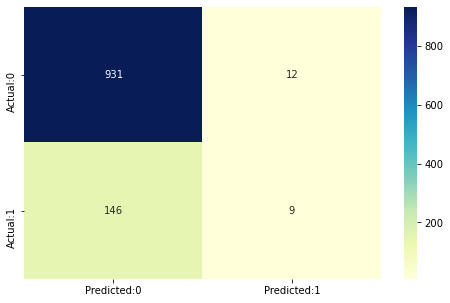

In [30]:
cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [31]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [32]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8561020036429873 
 The Missclassification = 1-Accuracy =  0.14389799635701273 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.05806451612903226 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9872746553552492 
 Positive Predictive value = TP/(TP+FP) =  0.42857142857142855 
 Negative predictive Value = TN/(TN+FN) =  0.8644382544103992 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.562903225806437 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9540764353279512


In [33]:
y_pred_prob=logmodel.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.915099,0.084901
1,0.937112,0.062888
2,0.412482,0.587518
3,0.888560,0.111440
4,0.712851,0.287149


In [34]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logmodel.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[358 585]
 [ 27 128]] 
 with 486 correct predictions and 27 Type II errors( False Negatives) 

 Sensitivity:  0.8258064516129032 Specificity:  0.3796394485683987 



With 0.2 threshold the Confusion Matrix is  
 [[750 193]
 [ 85  70]] 
 with 820 correct predictions and 85 Type II errors( False Negatives) 

 Sensitivity:  0.45161290322580644 Specificity:  0.7953340402969247 



With 0.3 threshold the Confusion Matrix is  
 [[867  76]
 [124  31]] 
 with 898 correct predictions and 124 Type II errors( False Negatives) 

 Sensitivity:  0.2 Specificity:  0.9194061505832449 



With 0.4 threshold the Confusion Matrix is  
 [[919  24]
 [140  15]] 
 with 934 correct predictions and 140 Type II errors( False Negatives) 

 Sensitivity:  0.0967741935483871 Specificity:  0.9745493107104984 





C:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.war

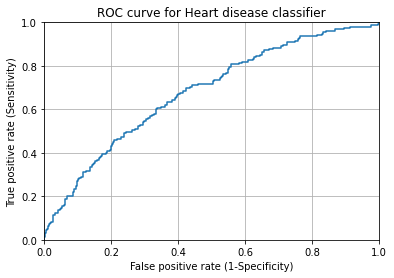

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.6779666814900969

In [37]:
import joblib

In [38]:
final_module = 'Final_finalized_model12345.sav'

In [39]:
joblib.dump(logmodel, final_module)

['Final_finalized_model12345.sav']

In [40]:
load_module = joblib.load(final_module)

In [41]:
result = load_module.score(X_test, y_test)

In [42]:
result

0.8561020036429873

In [65]:
final_features.head()

,male,sysBP,diaBP,cigsPerDay,currentSmoker,prevalentHyp,diabetes,glucose,TenYearCHD
0,1,106.0,70.0,0.0,0,0,0,77.0,0
1,0,121.0,81.0,0.0,0,0,0,76.0,0
2,1,127.5,80.0,20.0,1,0,0,70.0,0
3,0,150.0,95.0,30.0,1,1,0,103.0,1
4,0,130.0,84.0,23.0,1,0,0,85.0,0


In [66]:
# 'male','sysBP','diaBP','cigsPerDay','currentSmoker','prevalentHyp','diabetes','glucose','TenYearCHD'
x = [0,150.0,95.0,30.0,1,1,0,103.0]

In [67]:
a = np.array(x).reshape(-1, 8)

In [69]:
logmodel.predict(a)

array([0], dtype=int64)

In [68]:
load_module.predict(a)

array([0], dtype=int64)